# Heart Disease Affecting Factors

###### COLUMNS
0. HeartDiseaseorAttack - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
1. HighBP - Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
2. HighChol - Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
3. CholCheck - Cholesterol check within past five years
4. BMI - Body Mass Index (BMI)
5. Smoker - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
6. Stroke - (Ever told) you had a stroke.
7. Diabetes - (Ever told) you have diabetes
8. PhysActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
9. Fruits - Consume Fruit 1 or more times per day
10. Veggies - Consume Vegetables 1 or more times per day
11. HvyAlcoholConsump - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
12. AnyHealthcare - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
13. NoDocbcCost - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
14. GenHlth - Would you say that in general your health is?
15. MentHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
16. PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
17. DiffWalk - Do you have serious difficulty walking or climbing stairs?
18. Sex - Indicate sex of respondent.
19. Age - Fourteen-level age category.
20. Education - What is the highest grade or year of school you completed?
21. Income - Is your annual household income from all sources.

In [1]:
pip install plotly scipy statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats #Perfroming basic stats
import statsmodels.api as sm # for linear Regression
from statsmodels.formula.api import ols #ANOVA(Analysis of Variance)

In [4]:
df = pd.read_csv(r"D:\Rohini Personal\Portfolio Builder-20231213T063832Z-001\4. Healthcare – Cardiac Arrest Analysis\heart_disease_health_indicators.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df = df.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})

In [8]:
df.head()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [102]:
df['Smoker'] = df['Smoker'].replace(0, 'No')
df['Smoker'] = df['Smoker'].replace(1, 'Yes')

df['Diabetes'] = df['Diabetes'].replace(0, 'No')
df['Diabetes'] = df['Diabetes'].replace(1, 'Yes')

df['PhysActivity'] = df['PhysActivity'].replace(0, 'No')
df['PhysActivity'] = df['PhysActivity'].replace(1, 'Yes')

df['Fruits'] = df['Fruits'].replace(0, 'No')
df['Fruits'] = df['Fruits'].replace(1, 'Yes')

df['DiffWalk'] = df['DiffWalk'].replace(0, 'No')
df['DiffWalk'] = df['DiffWalk'].replace(1, 'Yes')

df['Veggies'] = df['Veggies'].replace(0, 'No')
df['Veggies'] = df['Veggies'].replace(1, 'Yes')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].replace(0, 'No')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].replace(1, 'Yes')

df['AnyHealthcare'] = df['AnyHealthcare'].replace(0, 'No')
df['AnyHealthcare'] = df['AnyHealthcare'].replace(1, 'Yes')

df['NoDocbcCost'] = df['NoDocbcCost'].replace(0, 'No')
df['NoDocbcCost'] = df['NoDocbcCost'].replace(1, 'Yes')

In [103]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Stroke,GenHlth,MentHlth,PhysHlth,Age,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.040571,2.511392,3.184772,4.242081,8.032119,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.197294,1.068477,7.412847,8.717951,3.054220,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,2.000000,0.000000,0.000000,6.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,2.000000,0.000000,0.000000,8.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,0.000000,3.000000,2.000000,3.000000,10.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,5.000000,30.000000,30.000000,13.000000,8.000000


In [11]:
df['Education']= df['Education'].astype('str')

In [12]:
df['Sex'] = df['Sex'].replace(0.0, 'Male')
df['Sex'] = df['Sex'].replace(1.0, 'Female')

In [13]:
df['HeartDisease'] = df['HeartDisease'].replace(0.0, 'No')
df['HeartDisease'] = df['HeartDisease'].replace(1.0, 'Yes')

# DEMOGRAPHICS 

### 1. Sex

In [14]:
Sex_disease = pd.crosstab(df['Sex'], df['HeartDisease'].astype(str))

In [15]:
Sex_disease

HeartDisease,No,Yes
Sex,,
Female,98018,13688
Male,131769,10205


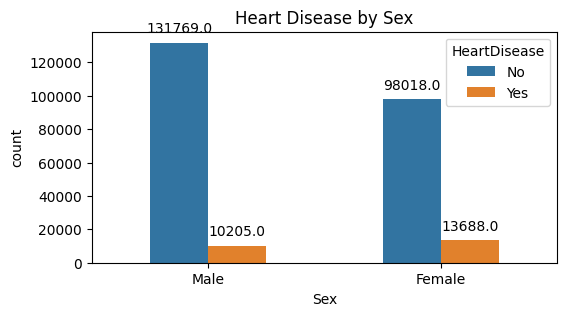

In [19]:
plt.figure(figsize=(6,3))
ax= sns.countplot(x='Sex',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Sex')
plt.show()

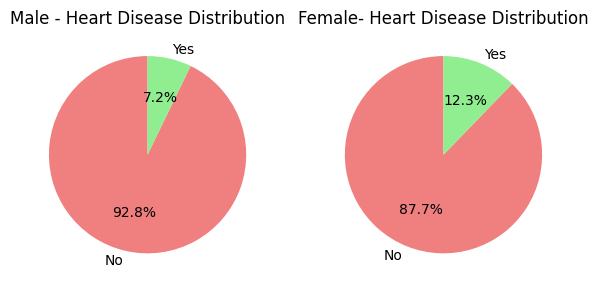

In [20]:
male_data = Sex_disease.loc['Male']
female_data = Sex_disease.loc['Female']

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.pie(male_data,labels = male_data.index, autopct ='%1.1f%%',startangle = 90,colors=['lightcoral','lightgreen'])
plt.title('Male - Heart Disease Distribution')

plt.subplot(1,2,2)
plt.pie(female_data, labels= female_data.index,autopct = '%1.1f%%',startangle = 90, colors=['lightcoral','lightgreen'])
plt.title('Female- Heart Disease Distribution')

plt.show()

### 2. Age

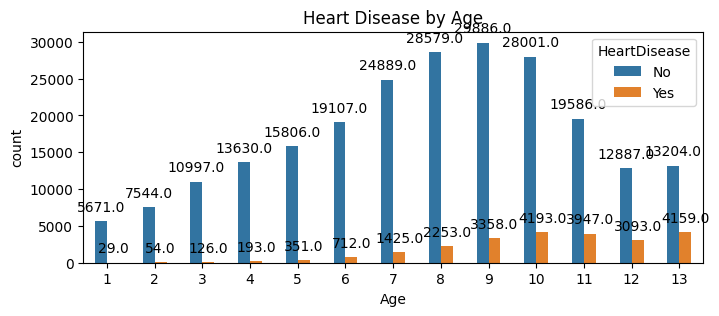

In [22]:
plt.figure(figsize=(8,3))
ax= sns.countplot(x='Age',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Age')
plt.show()

### 3. Education

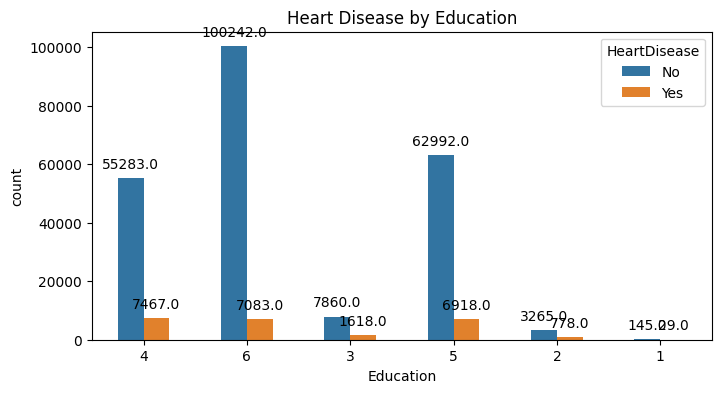

In [24]:
plt.figure(figsize=(8,4))
ax= sns.countplot(x='Education',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Education')
plt.show()

### 4. Income

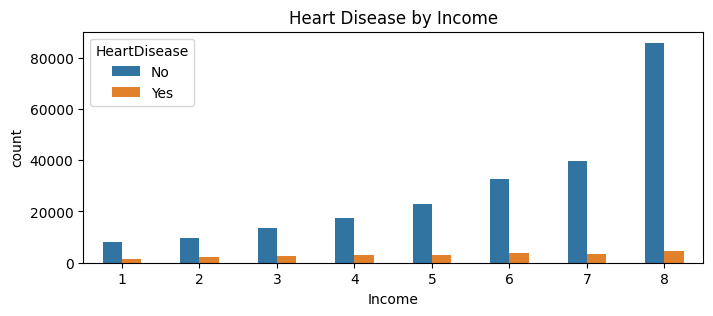

In [27]:
plt.figure(figsize=(8,3))
ax= sns.countplot(x='Income',hue = 'HeartDisease',data=df,width =0.5)
#for p in ax.patches:
    #ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
             #ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Income')
plt.show()

# 

# METABOLIC DISORDERS

### 1. High BP

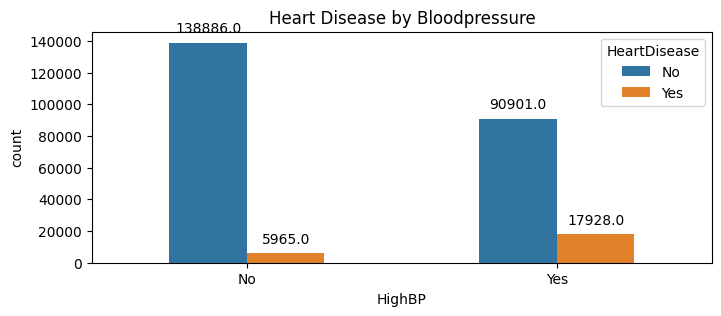

In [29]:
plt.figure(figsize=(8,3))
ax= sns.countplot(x='HighBP',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Bloodpressure')
plt.xticks([0,1],['No','Yes'])
plt.show()

### 2. Cholestrol  

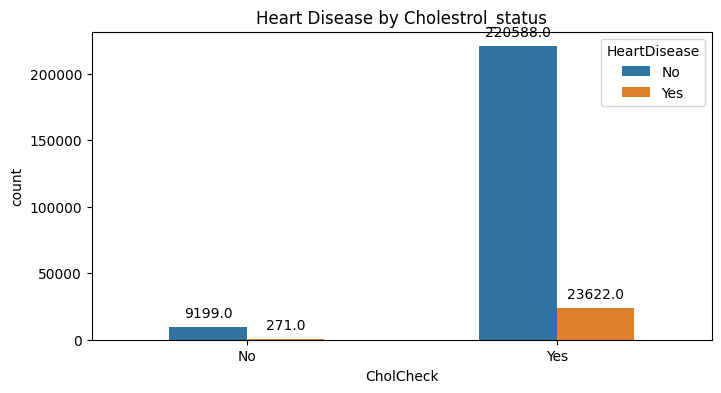

In [32]:
plt.figure(figsize=(8,4))
ax= sns.countplot(x='CholCheck',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Cholestrol_status')
plt.xticks([0,1],['No','Yes'])
plt.show()

### 3. Stroke

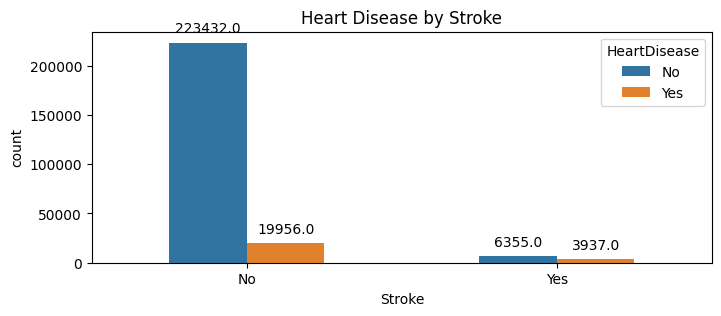

In [33]:
plt.figure(figsize=(8,3))
ax= sns.countplot(x='Stroke',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Stroke')
plt.xticks([0,1],['No','Yes'])
plt.show()

### 4. Diabetes

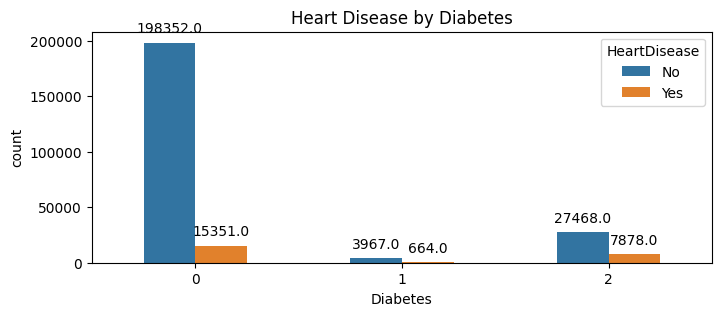

In [35]:
plt.figure(figsize=(8,3))
ax= sns.countplot(x='Diabetes',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by Diabetes')
#plt.xticks([0,1],['No','Yes'])
plt.show()

In [36]:
df.head(0)

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


### 5. BMI

In [40]:
#Create a column to know weight_status using BMI
def BMI_Category(BMI):
    if BMI<18.5:
        return 'Underweight'
    elif 18.5<=BMI<25:
        return 'Normal Weight'
    elif 25<= BMI<30:
        return 'Overweight'
    else:
        return 'Obesity'
df['weight_status'] = df['BMI'].apply(BMI_Category)

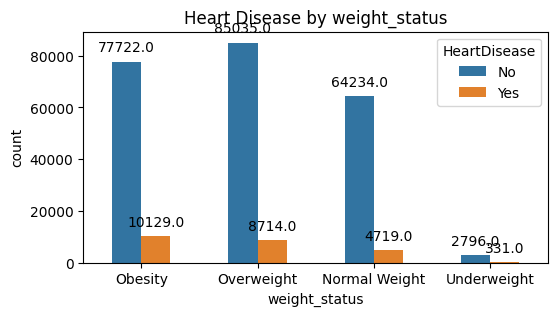

In [48]:
plt.figure(figsize=(6,3))
ax= sns.countplot(x='weight_status',hue = 'HeartDisease',data=df,width =0.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Heart Disease by weight_status')
plt.show()

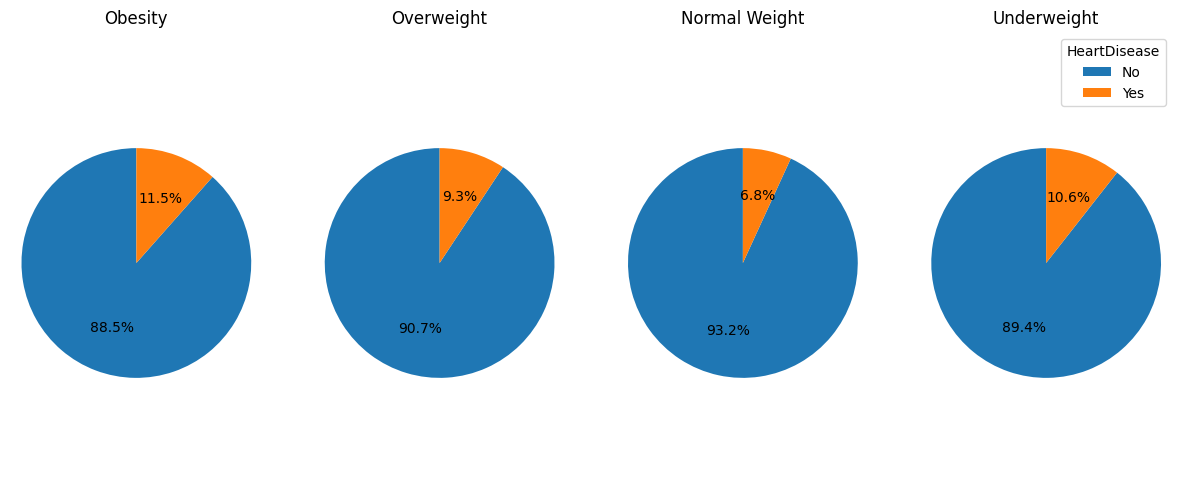

In [82]:
categories = df['weight_status'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(categories),figsize =(15,6))
for i,category in enumerate(categories):
    susbset = df[df['weight_status'] == category]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'{category}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[3].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

# HABBITS

### 1. Smokers

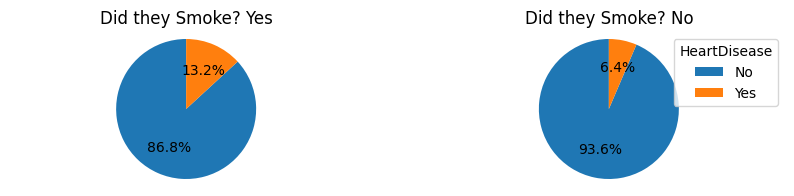

In [112]:
smoker = df['Smoker'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(smoker),figsize =(10,2))
for i,smoke in enumerate(smoker):
    susbset = df[df['Smoker'] == smoke]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'Did they Smoke? {smoke}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

In [85]:
df.head(0)

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,weight_status


### 2. Alcohol Consumption

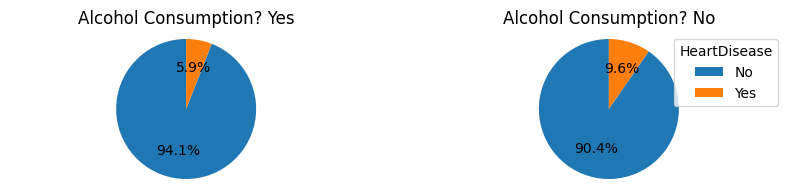

In [116]:
Alcohol = df['HvyAlcoholConsump'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(Alcohol),figsize =(10,2))
for i,alc in enumerate(smoker):
    susbset = df[df['HvyAlcoholConsump'] == alc]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'Alcohol Consumption? {alc}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

### 3. Eat Fruits?

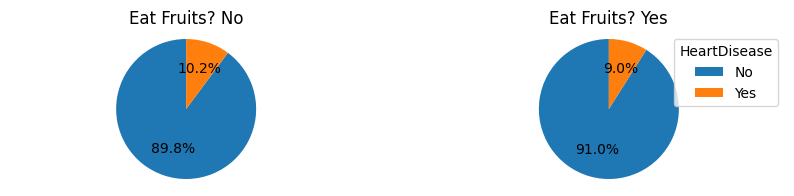

In [120]:
Fruits = df['Fruits'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(smoker),figsize =(10,2))
for i,f in enumerate(Fruits):
    susbset = df[df['Fruits'] == f]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'Eat Fruits? {f}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

### 4. Eat Veggies?

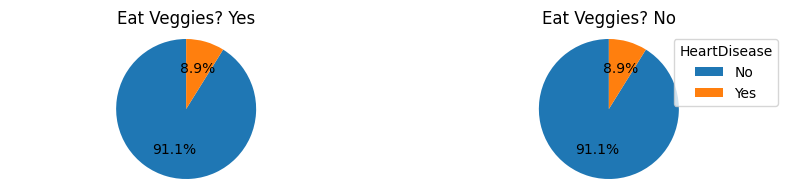

In [124]:
Veggies = df['Veggies'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(smoker),figsize =(10,2))
for i,Veg in enumerate(Veggies):
    susbset = df[df['Veggies'] == f]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'Eat Veggies? {Veg}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

### 5. Do Physical Activity?

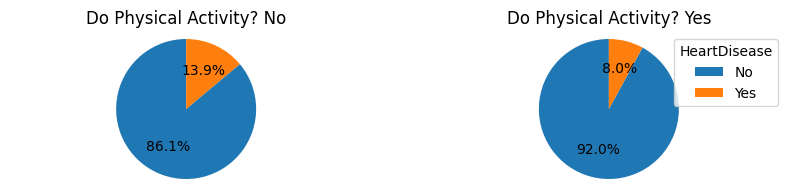

In [126]:
Physical = df['PhysActivity'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(smoker),figsize =(10,2))
for i,Phy in enumerate(Physical):
    susbset = df[df['PhysActivity'] == Phy]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'Do Physical Activity? {Phy}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

### 

### Needed but not shown to doctor?

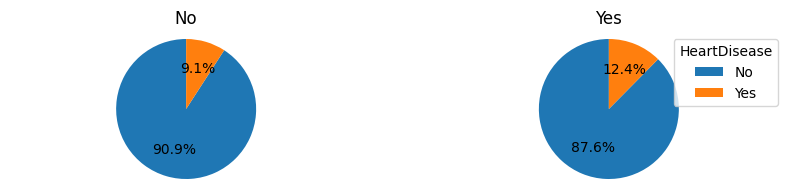

In [128]:
Doctor = df['NoDocbcCost'].unique()
fig,axes = plt.subplots(nrows=1,ncols=len(smoker),figsize =(10,2))
for i,doc in enumerate(Doctor):
    susbset = df[df['NoDocbcCost'] == doc]
    heart_disease_counts = susbset['HeartDisease'].value_counts()
    
    axes[i].set_title(f'{doc}')
    axes[i].pie(heart_disease_counts, autopct ='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[1].legend(title='HeartDisease', labels=heart_disease_counts.index.tolist())

plt.show()

In [113]:
df.columns

Index(['HeartDisease', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'weight_status'],
      dtype='object')

# HEALTH HISTORY

### 1. Days of Poor Physical Health (Last 30 Days)

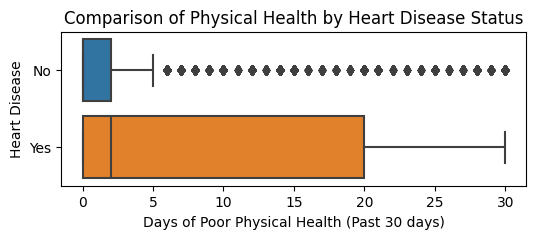

In [136]:
plt.figure(figsize=(6, 2))
sns.boxplot( x='PhysHlth',y='HeartDisease', data=df)
plt.title('Comparison of Physical Health by Heart Disease Status')
plt.ylabel('Heart Disease')
plt.xlabel('Days of Poor Physical Health (Past 30 days)')
plt.show()

### 2. Days of Poor Mental Health (Last 30 Days)

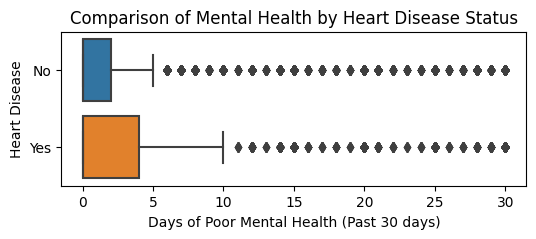

In [138]:
plt.figure(figsize=(6, 2))
sns.boxplot( x='MentHlth',y='HeartDisease', data=df)
plt.title('Comparison of Mental Health by Heart Disease Status')
plt.ylabel('Heart Disease')
plt.xlabel('Days of Poor Mental Health (Past 30 days)')
plt.show()

### 3. Days of Poor Mental Health (Last 30 Days)

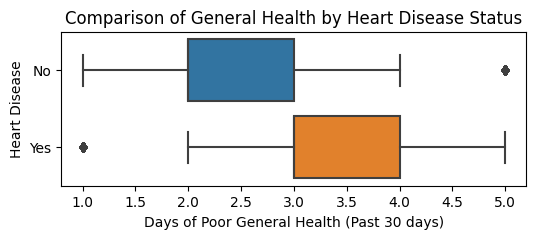

In [140]:
plt.figure(figsize=(6, 2))
sns.boxplot( x='GenHlth',y='HeartDisease', data=df)
plt.title('Comparison of General Health by Heart Disease Status')
plt.ylabel('Heart Disease')
plt.xlabel('Days of Poor General Health (Past 30 days)')
plt.show()